In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
"""
title = {NFL Big Data Bowl 2025},
publisher = {Kaggle},
year = {2024},
url = {https://kaggle.com/competitions/nfl-big-data-bowl-2025}
"""

'\ntitle = {NFL Big Data Bowl 2025},\npublisher = {Kaggle},\nyear = {2024},\nurl = {https://kaggle.com/competitions/nfl-big-data-bowl-2025}\n'

In [10]:
# Import Basis
import pandas as pd 
#import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import math
#from io import StringIO
#from colorama import Fore, Style, init;
# Import necessary libraries
#from IPython.display import display, HTML
#from scipy.stats import skew  
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer

In [11]:
games = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/games.csv')
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/players.csv')
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')
#player_play = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv')

In [12]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [13]:
players["birthDate"] = pd.to_datetime(players["birthDate"], format='mixed')
players['birthYear'] = pd.DatetimeIndex(players['birthDate']).year

count    1210.000000
mean     1994.526446
std         2.764488
min      1977.000000
25%      1993.000000
50%      1995.000000
75%      1997.000000
max      1999.000000
Name: birthYear, dtype: float64


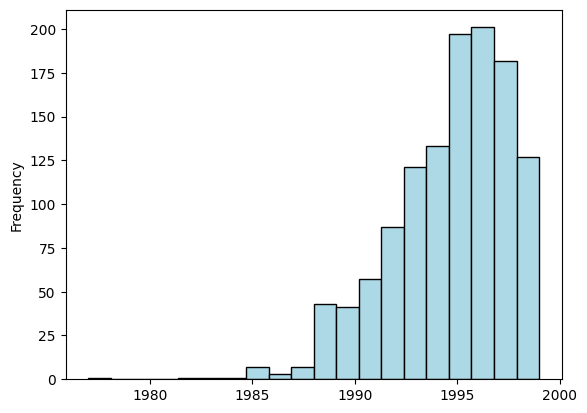

In [14]:
print(players["birthYear"].describe())
hist = players["birthYear"].plot.hist(bins=20, color="lightblue", edgecolor="black")

In [15]:
#Look at collegeName Column
print("Top 20 Player Producing Schools:")
college_names = players.pivot_table(index = ['collegeName'], aggfunc = 'size') 
college_names = college_names.reset_index()
college_names.columns= ["College Names", "Counts"]
college_names = college_names.sort_values("Counts", ascending = False)
college_names.head(20)


Top 20 Player Producing Schools:


,College Names,Counts
0,Alabama,59
94,Louisiana State,49
137,Ohio State,49
64,Georgia,41
107,Michigan,35
135,Notre Dame,35
82,Iowa,32
143,Penn State,31
55,Florida,31
138,Oklahoma,29


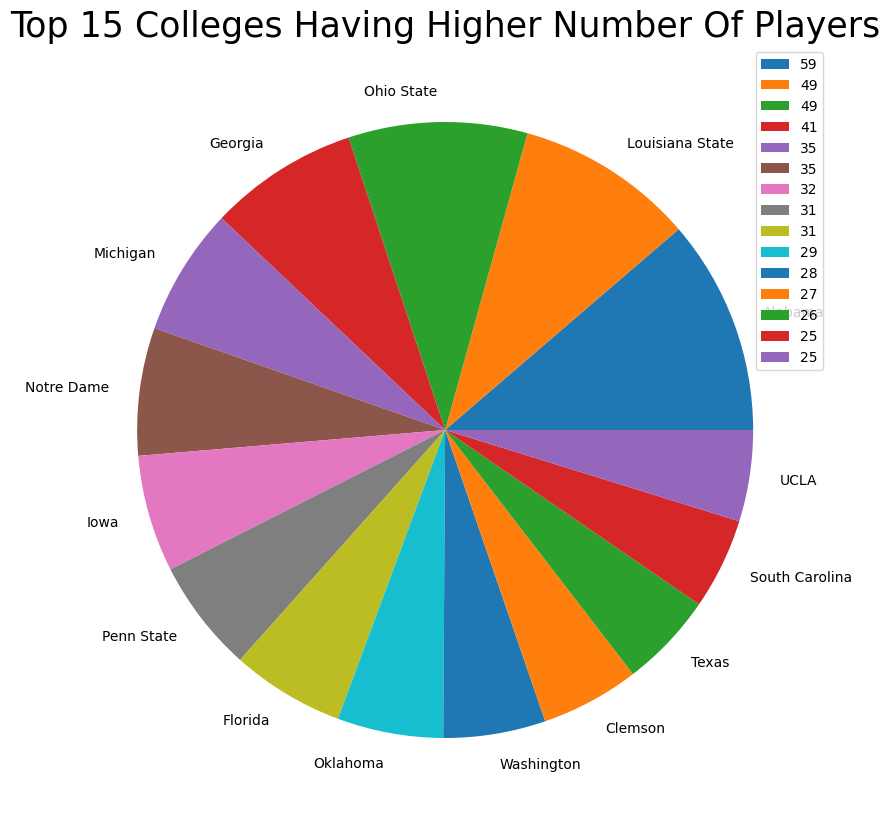

In [16]:
top_colleges = college_names[0:15]
fig = plt.figure(figsize = (10,10))
pie = plt.pie(top_colleges["Counts"], labels = top_colleges["College Names"])
plt.legend(top_colleges["Counts"])
plt.title("Top 15 Colleges Having Higher Number Of Players", fontsize=25)

plt.show()

In [17]:
#look at positions
pos_val = players.pivot_table(index = ['position'], aggfunc = 'size') 

In [18]:
pos_val = pos_val.reset_index()
pos_val.columns= ["Positions", "Counts"]
pos_val = pos_val.sort_values("Counts", ascending = False)
print(pos_val.head(10))


   Positions  Counts
18        WR     224
1         CB     189
12       OLB     135
3         DE     131
14        RB     126
17        TE     123
4         DT     121
16         T     117
7          G     107
8        ILB      93


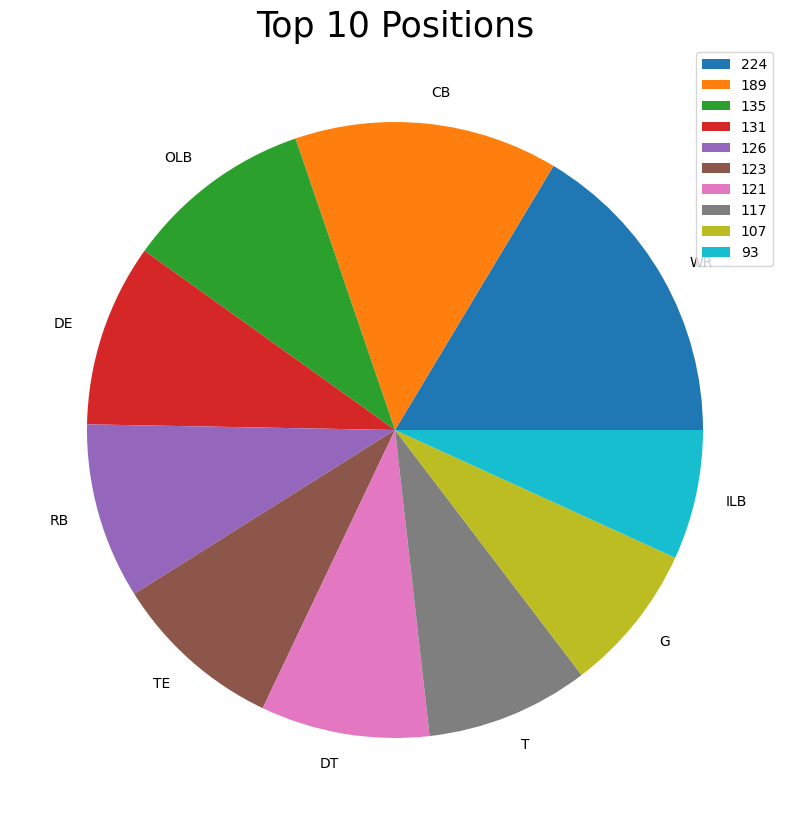

In [19]:
top_pos = pos_val[0:10]
fig = plt.figure(figsize = (10,10))
pie = plt.pie(top_pos["Counts"], labels = top_pos["Positions"])
plt.legend(top_pos["Counts"])
plt.title("Top 10 Positions", fontsize=25)

plt.show()

In [20]:
#look at height and weight
heights = players.pivot_table(index = ['height'], aggfunc = 'size') 
heights = heights.reset_index()
heights.columns= ["Heights", "Counts"]
heights = heights.sort_values("Counts", ascending = False)
print(heights.head(10))

   Heights  Counts
9      6-3     258
10     6-4     235
7      6-1     200
11     6-5     200
8      6-2     190
6      6-0     156
1     5-11     130
12     6-6     113
0     5-10      90
5      5-9      46


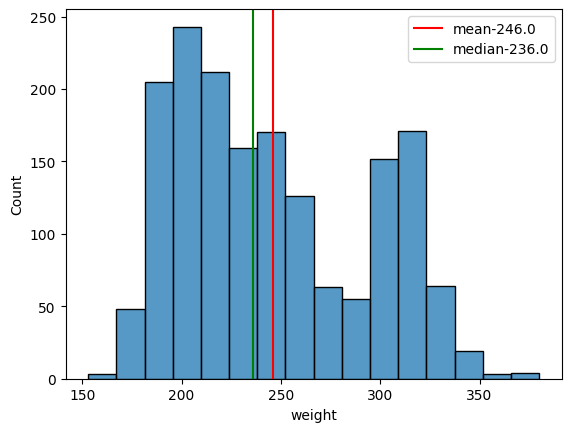

In [21]:
mean=np.ceil(players['weight'].mean())
median=np.ceil(players['weight'].median())
hist = sns.histplot(players['weight'])
hist.axvline(mean, color = 'r', label = f'mean-{mean}')
hist.axvline(median, color = 'g', label = f'median-{median}')
plt.legend();

## Look at Games Dataset


In [22]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [23]:
games.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


In [24]:
games.dtypes

gameId                int64
season                int64
week                  int64
gameDate             object
gameTimeEastern      object
homeTeamAbbr         object
visitorTeamAbbr      object
homeFinalScore        int64
visitorFinalScore     int64
dtype: object

In [25]:
#Only contains the 2022 Season in Games Dataset
g_season = games.pivot_table(index = ['season'], aggfunc = 'size') 
g_season = g_season.reset_index()
g_season.columns= ["Seasons", "Counts"]
g_season = g_season.sort_values("Counts", ascending = False)
print(g_season)

   Seasons  Counts
0     2022     136


In [26]:
#9 total weeks- about equal counts
g_week = games.pivot_table(index = ['week'], aggfunc = 'size') 
g_week = g_week.reset_index()
g_week.columns= ["Weeks", "Counts"]
g_week = g_week.sort_values("Counts", ascending = False)
print(g_week)

   Weeks  Counts
0      1      16
1      2      16
2      3      16
3      4      16
4      5      16
7      8      15
5      6      14
6      7      14
8      9      13


In [27]:
g_time = games.pivot_table(index = ['gameTimeEastern'], aggfunc = 'size') 
g_time = g_time.reset_index()
g_time.columns= ["Time", "Counts"]
g_time = g_time.sort_values("Counts", ascending = False)
print(g_time)

       Time  Counts
0  13:00:00      73
2  16:25:00      21
4  20:15:00      16
1  16:05:00      11
5  20:20:00      10
7   9:30:00       3
3  19:15:00       1
6  20:30:00       1


In [28]:
#look at home teams and visitor teams
#want to look at the home and visitor team for each game
#scores for home vs visitor-done
#percentage of time the home team won-done
#average score for home and average for visitor-done
#break this down by each team
#original Tables and graphs:

In [29]:
games[['homeTeamAbbr','homeFinalScore']].describe()

,homeFinalScore
count,136.000000
mean,22.669118
std,8.659874
min,3.000000
25%,17.000000
50%,22.500000
75%,27.000000
max,49.000000


In [30]:
games[['visitorTeamAbbr','visitorFinalScore']].describe()

,visitorFinalScore
count,136.000000
mean,20.948529
std,9.731446
min,0.000000
25%,14.750000
50%,20.000000
75%,27.000000
max,48.000000


In [31]:
#Comparing home to visitor score- on what percentage does home advantage
#work?
games['home_advant'] = games.apply(lambda x: 1 
                          if x['homeFinalScore'] > x['visitorFinalScore']
                         else 0, axis = 1)
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,home_advant
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31,0
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27,0
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26,0
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10,1
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23,0


In [32]:
print(games.pivot_table(index = 'home_advant',aggfunc = 'size'))
#1 if the home team one, 0 if visitor team won
print(round(73/136,2))
print(round(63/136,2))

home_advant
0    63
1    73
dtype: int64
0.54
0.46


In [33]:
home_team_games = games.pivot_table(index = ['homeTeamAbbr'], 
                                    columns = 'home_advant',aggfunc= 'size')
home_team_games.columns = ["Losses", "Wins"]
home_team_games = home_team_games.sort_values("Wins", ascending = False)
home_team_games['Home Percentage'] = home_team_games.apply(lambda x: 
                            x['Wins'] / (x['Wins'] + x['Losses']), 
                                                           axis = 1)
home_team_games.head(10)

,Losses,Wins,Home Percentage
homeTeamAbbr,,,
DAL,1.0,4.0,0.80
PHI,NaN,4.0,NaN
MIN,NaN,4.0,NaN
BUF,NaN,3.0,NaN
CIN,1.0,3.0,0.75
SEA,1.0,3.0,0.75
MIA,1.0,3.0,0.75
NYG,1.0,3.0,0.75
KC,1.0,3.0,0.75


### Looking at the Plays Dataset

In [34]:
plays.head(5)
    

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [35]:
play_ids= plays.pivot_table(index = 'playId', 
                  values = ['yardsGained','homeTeamWinProbabilityAdded'])
play_ids=play_ids.sort_values(['homeTeamWinProbabilityAdded','yardsGained'], axis = 0, 
                     ascending = False)
play_ids.head(10)

,homeTeamWinProbabilityAdded,yardsGained
playId,,
4168,0.471527,28.0
3762,0.421801,0.0
2459,0.305680,0.0
4224,0.299683,1.0
3792,0.287670,12.0
4073,0.284064,0.0
4427,0.255303,30.0
4126,0.247667,0.0
4174,0.239191,0.0


In [36]:
play_ids_by_team= plays.pivot_table(index = 'possessionTeam', 
                  values = ['yardsGained','homeTeamWinProbabilityAdded'])
play_ids_by_team=play_ids_by_team.sort_values(['homeTeamWinProbabilityAdded','yardsGained'], axis = 0, 
                     ascending = False)
play_ids_by_team.head(10)
#top team's with highest homeTeamWinProbabilityAdded

,homeTeamWinProbabilityAdded,yardsGained
possessionTeam,,
SF,0.003249,6.112335
MIN,0.003007,5.207039
LV,0.002463,5.501066
ATL,0.002393,5.569472
IND,0.002049,4.776042
GB,0.001601,5.378182
TEN,0.001562,4.988095
DET,0.001477,5.904167
ARI,0.001309,4.889279
